## Linear Regression

### Project Description:
The Stock Market has always been a prime target for predictive analysis. With each passing day, fortunes rise and fall according to the price of each stock. Here, I wanted to determine if there was a relation between the **closing price** - the most recent valuation of a security until the next working day - and that day's **opening price** - the price at which a security first trades upon the opening of an exchange on a trading day.

### Contents:
- Importing Libraries
- Creating a pandas dataframe from the imported `.csv` file
- Visualizing the parameters of interest
- Applying Linear Regression

## 1. Importing Libraries
We import pandas and numpy to handle the data, mathplotlib to visualize the data, and the scikit-learn modules to perform analytics on the data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

## 2. Creating a Dataframe from the CSV

Since I created this via Google Colabs, I used `files` from the `google.colab` module to upload the `prices.csv` file

The dataset used (`prices.csv`) is obtained from the [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse?select=prices.csv) created by Dominik Gawlik and made availible via Kaggle. A few modifications were done to reduce the file size

The modified dataset has the columns `open`, `close`, `low`, `high` and `volume` as seen in the given sample

Of these, we'll only focus on the first two columns

In [1]:
# Importing the Dataset
from google.colab import files
file_handle = files.upload()

Saving prices.csv to prices.csv


In [3]:
df = pd.read_csv("prices.csv")
df.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600
1,125.239998,119.980003,119.940002,125.540001,2386400
2,116.379997,114.949997,114.930000,119.739998,2489500
3,115.480003,116.620003,113.500000,117.440002,2006300
4,117.010002,114.970001,114.089996,117.330002,1408600


## Taking a Look at the Data

At first, I was unsure of which values to choose. At closer scrutiny of the sample, I noticed that the opening and closing prices seemed to be closely interlinked. However, I was still unsure if this was the case throughout the dataset.

Thus, I plotted them individually, and then together for comparision

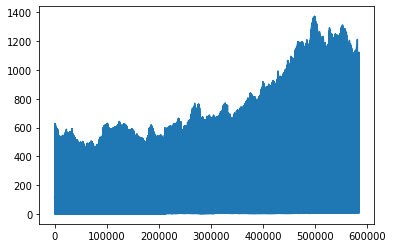

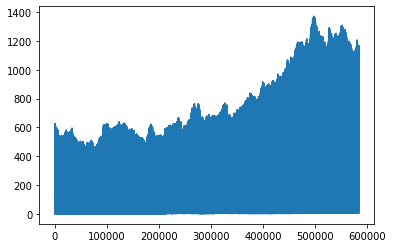

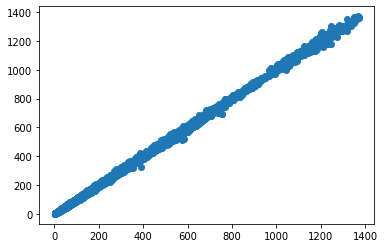

In [64]:
# Independant Variable -> Open
plt.plot(df["open"])
plt.show()

# Dependant Variable -> Close
plt.plot(df["close"])
plt.show()

plt.scatter(df["open"], df["close"])
plt.show()

## Applying Linear Regression
Having decided on the two vaiables to take into consideration, I proceeded to load them into a numpy array, reshaped the same, and split them into training and testing datasets. Here, the size of the testing dataset is a fourth of that of the training dataset.

Following this, I started training the Linear Regression model.

In [56]:
x = np.array(df["open"]).reshape(-1, 1)
y = np.array(df["close"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
reg = lr()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Once the model is trained, we can test it using the test dataset

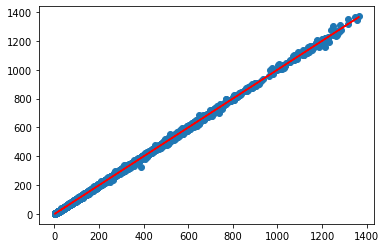

In [57]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color ='red')

plt.show()

## Conclusion

Thus, we can safely conclude that the `closing price` is dependent on the `opening price`